Acknowledgment: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/OOP_in_ML/Class_MyLinearRegression.ipynb

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Recall 4 pillars of OOP
- Abstraction
- Encapsulation
- Inheritance 
- Polymorphism

# MyLinearRegression Class

In [2]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept



# Create instance and check attributes

In [3]:
mlr = MyLinearRegression()

print(mlr._fit_intercept)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr)

True
None
None


# Description Method

In [6]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    


mlr = MyLinearRegression()


print(mlr)

I am a Linear Regression model!


# "Fit" method

In [7]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef


# Generate Data

In [8]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [9]:
X

array([[5.37421469, 0.17569687],
       [8.37409083, 2.18995162],
       [7.54185064, 9.71983912],
       [6.60293229, 8.22613019],
       [4.96000067, 5.11046457],
       [2.15649769, 8.9146926 ],
       [5.96202411, 8.94196556],
       [4.18749217, 4.3149826 ],
       [8.76091721, 5.44088756],
       [6.56581518, 7.76547519],
       [8.27001518, 9.64139615],
       [2.80199772, 4.59550237],
       [1.31848498, 2.82221392],
       [6.2576594 , 5.23115063],
       [5.16643099, 4.38608164],
       [0.4042242 , 2.54577845],
       [6.93076754, 7.44041232],
       [5.21046095, 1.24354458],
       [8.79844161, 0.82959112],
       [9.34036543, 7.00066863]])

In [10]:
y

array([19.69046341, 27.64503835, 18.19786014,  7.74611191, 11.45746176,
       -0.90660451,  8.75334171,  9.34834654, 24.52584512, 15.19445578,
       20.07001774,  1.77496482,  2.14962369, 16.15090805, 11.61561684,
       -2.97544487, 17.06246475, 17.27987859, 29.7702079 , 26.09410389])

# Instantiate a new MyLinearRegression object and fit the data

In [11]:
mlr = MyLinearRegression()



print("We have not fitted the data yet. There is no regression coefficients")
print("Regression coefficients:", mlr.coef_)

We have not fitted the data yet. There is no regression coefficients
Regression coefficients: None


In [14]:
mlr.fit(X,y)

print("We have fitted the data. We can print the regression coefficients now")
print("Regression coefficients:", mlr.coef_)
print("The intercept term is given by: ", round(mlr.intercept_, 4))

We have fitted the data. We can print the regression coefficients now
Regression coefficients: [ 3.67531682 -1.12899488]
The intercept term is given by:  -1.0841


# Compare fitted values vs. actual values

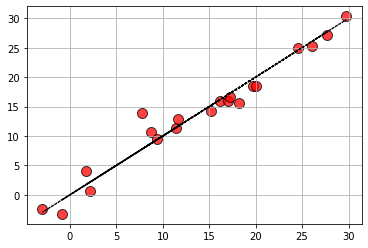

In [16]:
coef_ = mlr.coef_
y_pred = np.dot(X,coef_)+mlr.intercept_

plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()

# Encapsulate methods inside class

In [17]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()


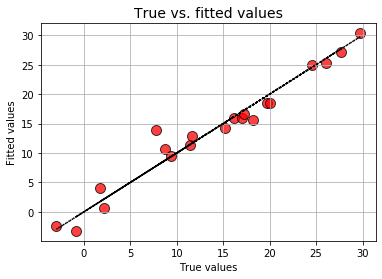

In [19]:
# A fresh instance
mlr = MyLinearRegression()
# Fitting with the data
mlr.fit(X,y)

# Call the 'plot_fitted' method
mlr.plot_fitted(reference_line=True)

# Add a predict method

In [20]:


class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_



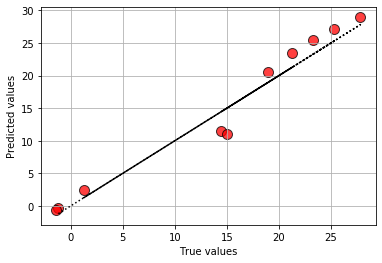

In [21]:
num_new_samples = 10
X_new = 10*np.random.random(size=(num_new_samples,2))
y_new = 3.5*X_new.T[0]-1.2*X_new.T[1]+2*np.random.randn(num_new_samples)

mlr = MyLinearRegression()
mlr.fit(X,y)
y_pred=mlr.predict(X_new)

plt.scatter(y_new,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y_new,y_new,c='k',linestyle='dotted')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.show()


# Metrics Class

In [22]:
class Metrics:
              
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.resid_) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target_)
        squared_errors = (self.target_ - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self.dfe_) / (self.sst()/self.dft_)
        return self.adj_r_sq_
    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.predict(self.features_) - self.target_) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  ('adj_r^2:', self.adj_r_squared()))
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

# Inheritance of Metrics Class

In [24]:
class MyLinearRegression(Metrics):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [25]:
mlr = MyLinearRegression()
fit=mlr.fit(X,y)

mlr.sse()
mlr.sst()
mlr.r_squared()
mlr.pretty_print_stats()

sse:     70.9754
sst:     1705.6462
mse:     3.5488
r^2:     0.9584
adj_r^2: 0.9535


In [26]:
mlr.resid_

array([ 1.22095265,  0.42411568,  2.53688824, -6.15042733,  0.08164623,
        2.31629557, -1.97948242, -0.08635057, -0.44649704,  0.91425656,
        1.64424876, -2.25089586,  1.57410875,  0.14203951, -1.33672014,
       -0.50285601,  1.07395569,  0.61780933, -0.54617837,  0.75309077])

# Diagnostics Plot Class

In [30]:
class Diagnostics_plots:
    
    def __init__():
        pass
    
    def fitted_vs_residual(self):
        '''Plots fitted values vs. residuals'''
        plt.title("Fitted vs. residuals plot",fontsize=14)
        plt.scatter(self.fitted_,self.resid_,edgecolor='k')
        plt.hlines(y=0,xmin=np.amin(self.fitted_),xmax=np.amax(self.fitted_),color='k',linestyle='dashed')
        plt.xlabel("Fitted values")
        plt.ylabel("Residuals")
        plt.show()
    
    def fitted_vs_features(self):
        '''Plots residuals vs all feature variables in a grid'''
        num_plots = self.features_.shape[1]
        if num_plots%3==0:
            nrows = int(num_plots/3)
        else:
            nrows = int(num_plots/3)+1
        ncols = 3
        fig, ax = plt.subplots(nrows, ncols, figsize=(15,nrows*3.5))
        axes = ax.ravel()
        for i in range(num_plots,nrows*ncols):
            axes[i].set_visible(False)
        for i in range(num_plots):
            axes[i].scatter(self.features_.T[i],self.resid_,color='orange',edgecolor='k',alpha=0.8)
            axes[i].grid(True)
            axes[i].set_xlabel("Feature X[{}]".format(i))
            axes[i].set_ylabel("Residuals")
            axes[i].hlines(y=0,xmin=np.amin(self.features_.T[i]),xmax=np.amax(self.features_.T[i]),
                           color='k',linestyle='dashed')
        plt.show()
        
    def histogram_resid(self,normalized=True):
        '''Plots a histogram of the residuals (can be normalized)'''
        if normalized:
            norm_r=self.resid_/np.linalg.norm(self.resid_)
        else:
            norm_r = self.resid_
        num_bins=min(20,int(np.sqrt(self.features_.shape[0])))
        plt.title("Histogram of the normalized residuals")
        plt.hist(norm_r,bins=num_bins,edgecolor='k')
        plt.xlabel("Normalized residuals")
        plt.ylabel("Count")
        plt.show()
    
    def shapiro_test(self,normalized=True):
        '''Performs Shapiro-Wilk normality test on the residuals'''
        from scipy.stats import shapiro
        if normalized:
            norm_r=self.resid_/np.linalg.norm(self.resid_)
        else:
            norm_r = self.resid_
        _,p = shapiro(norm_r)
        if p > 0.01:
            print("The residuals seem to have come from a Gaussian process")
        else:
            print("The residuals does not seem to have come from a Gaussian process. \
            \nNormality assumptions of the linear regression may have been violated.")
        
    def qqplot_resid(self,normalized=True):
        '''Creates a quantile-quantile plot for residuals comparing with a normal distribution'''
        from scipy.stats import probplot
        if normalized:
            norm_r=self.resid_/np.linalg.norm(self.resid_)
        else:
            norm_r = self.resid_
        plt.title("Q-Q plot of the normalized residuals")
        probplot(norm_r,dist='norm',plot=plt)
        plt.xlabel("Theoretical quantiles")
        plt.ylabel("Residual quantiles")
        plt.show()
        
class MyLinearRegression(Metrics, Diagnostics_plots):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_


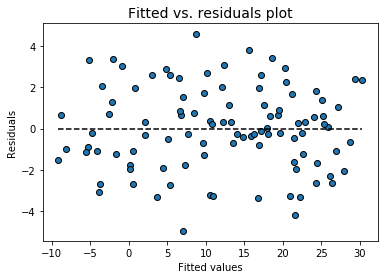

In [34]:
num_samples=100
num_dim = 2
X = 10*np.random.random(size=(num_samples,num_dim))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(num_samples)



mlr = MyLinearRegression()
mlr.fit(X,y)

mlr.fitted_vs_residual()

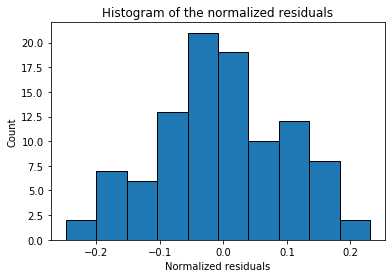

In [35]:
mlr.histogram_resid()

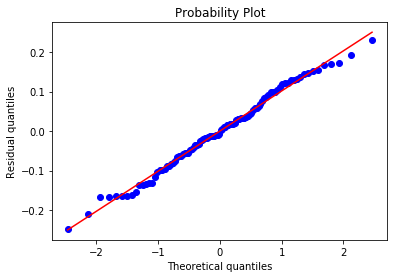

In [36]:
mlr.qqplot_resid()

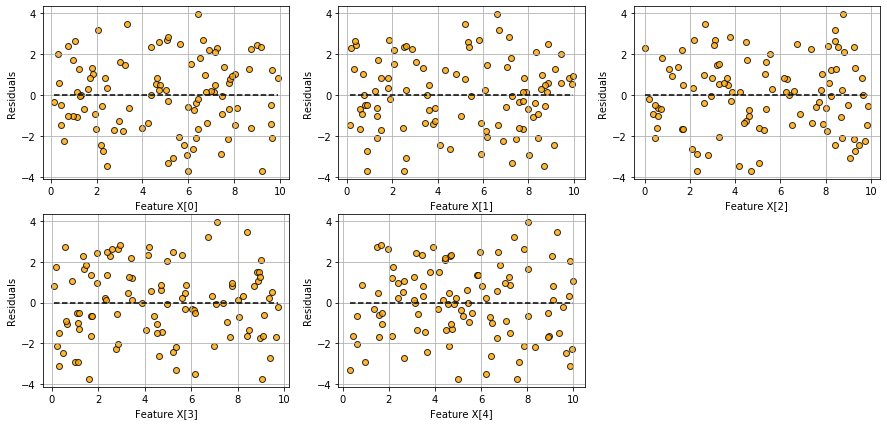

In [37]:
num_samples=100
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

mlr.fit(X,y)
mlr.fitted_vs_features()

In [38]:
mlr.shapiro_test()

The residuals seem to have come from a Gaussian process


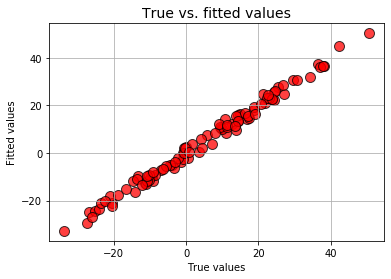

In [39]:
mlr.plot_fitted()

# Data plots class

In [41]:
class Data_plots:
    
    def __init__():
        pass
    
    def pairplot(self):
        '''Creates pairplot of all variables and the target using the Seaborn library'''
        
        print ("This may take a little time. Have patience...")
        from seaborn import pairplot
        from pandas import DataFrame
        df = DataFrame(np.hstack((self.features_,self.target_.reshape(-1,1))))
        pairplot(df)
        plt.show()
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
        
class MyLinearRegression(Metrics, Diagnostics_plots,Data_plots):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

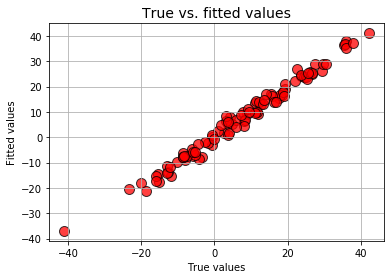

In [55]:
num_samples=100
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

mlr = MyLinearRegression()
mlr.fit(X,y)
mlr.plot_fitted()

This may take a little time. Have patience...


/Users/timothy328/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/timothy328/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


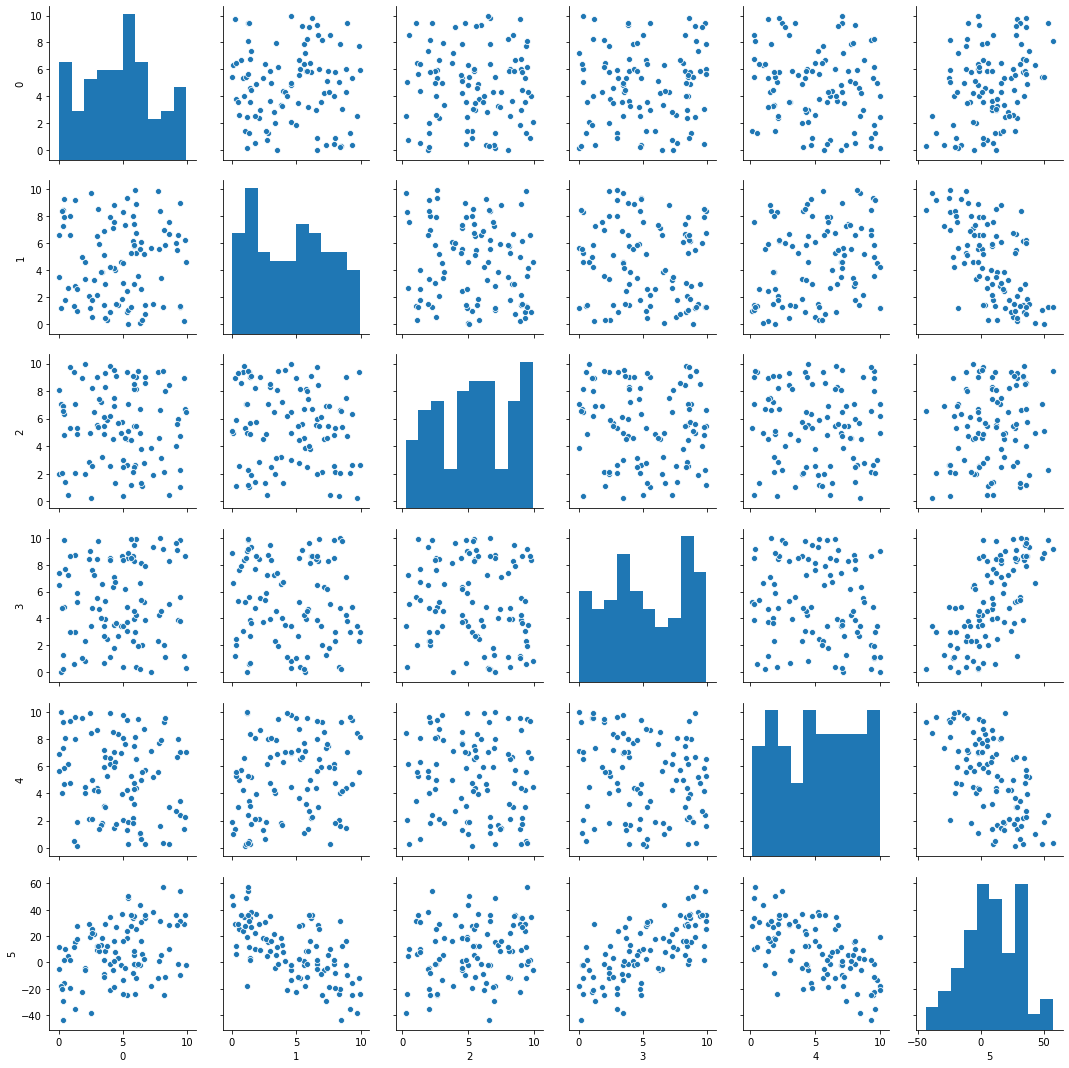

In [43]:
mlr.pairplot()

# Outliers and Multicollinearity Classes

In [49]:
class Outliers:
    
    def __init__():
        pass
    
    def cook_distance(self):
        '''Computes and plots Cook\'s distance'''
        import statsmodels.api as sm
        from statsmodels.stats.outliers_influence import OLSInfluence as influence
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        inf=influence(lm)
        (c, p) = inf.cooks_distance
        plt.figure(figsize=(8,5))
        plt.title("Cook's distance plot for the residuals",fontsize=14)
        plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
        plt.grid(True)
        plt.show()
    
    def influence_plot(self):
        '''Creates the influence plot'''
        import statsmodels.api as sm
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        fig, ax = plt.subplots(figsize=(10,8))
        fig = sm.graphics.influence_plot(lm, ax= ax, criterion="cooks")
        plt.show()
    
    def leverage_resid_plot(self):
        '''Plots leverage vs normalized residuals' square'''
        import statsmodels.api as sm
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        fig, ax = plt.subplots(figsize=(10,8))
        fig = sm.graphics.plot_leverage_resid2(lm, ax= ax)
        plt.show()
    
class Multicollinearity:
    
    def __init__():
        pass
    
    def vif(self):
        '''Computes variance influence factors for each feature variable'''
        import statsmodels.api as sm
        from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        for i in range(self.features_.shape[1]):
            v=vif(np.matrix(self.features_),i)
            print("Variance inflation factor for feature {}: {}".format(i,round(v,2)))

In [50]:
class MyLinearRegression(Metrics, Diagnostics_plots,Data_plots,Outliers,Multicollinearity):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [60]:
num_samples=200
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

mlr = MyLinearRegression()
mlr.fit(X,y)

# mlr.cook_distance()

In [57]:
# mlr.influence_plot()

In [58]:
# mlr.leverage_resid_plot()

In [59]:
# mlr.vif()